In [11]:
#warnings
import warnings
warnings.filterwarnings('ignore')
#cleaning,processing
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np
import scipy
import math
import collections
# visualization
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
from sklearn.metrics import mean_absolute_error

In [12]:
df=pd.read_csv(r"C:\Users\youssef azam\Desktop\heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [14]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [15]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [17]:
df.shape

(303, 14)

In [18]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [19]:
m=df['age'].min()
mx=df['age'].max()
ME=df['age'].mean()
print('min of age people to have heart dieses = ',m,
      '\n max of age people to have heart dieses = ',
      mx,'\n mean of age people to have heart dieses = ',ME)

min of age people to have heart dieses =  29 
 max of age people to have heart dieses =  77 
 mean of age people to have heart dieses =  54.366336633663366


In [20]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [21]:
df.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [22]:
df.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [23]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [24]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [25]:
df.drop_duplicates(inplace=True)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>],
       [<AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

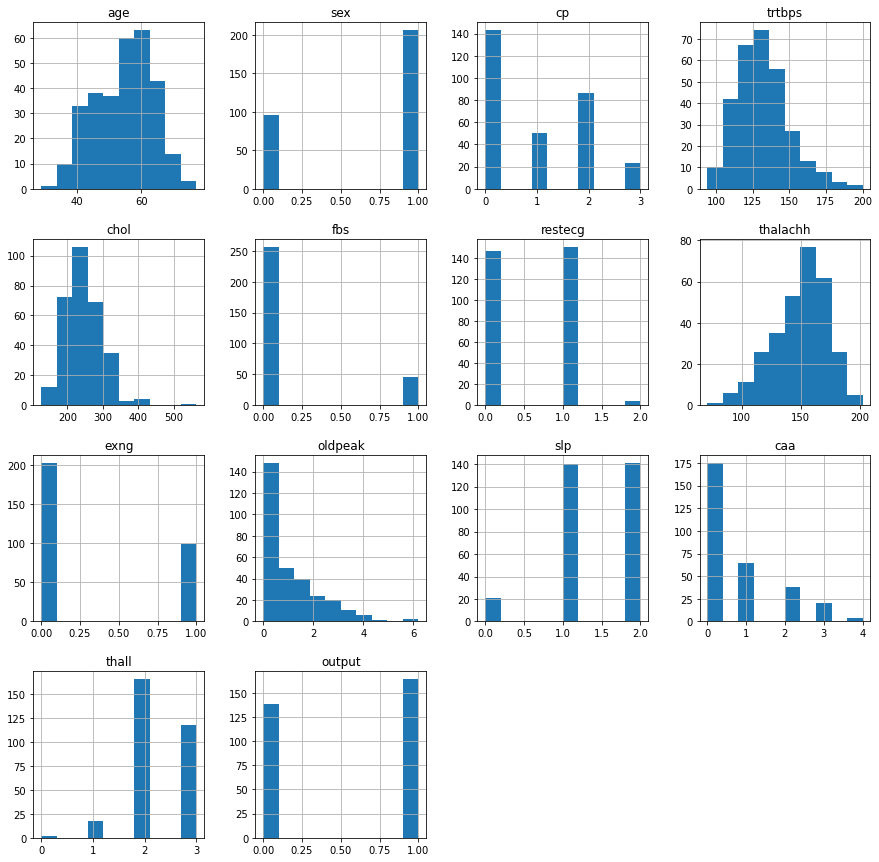

In [26]:
df.hist(figsize=(15,15))

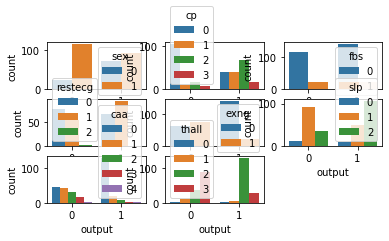

In [27]:
#Subplot function
def splot(index, row, column):
    plt.subplot(index, row, column)

figsize=(30,30)
list_col = list(df.columns)
indices = 0,3,4,7,9,13
list_col1 = [i for j, i in enumerate(list_col) if j not in indices]

i = 1
for col in list_col1:
    splot(4, 3, i)
    sns.countplot(x=df.output, hue=df[col]);
    labels=(f"Distribution of Output by {col}", f"{col}", "Count");
    i= i+1
    

<AxesSubplot:xlabel='sex', ylabel='count'>

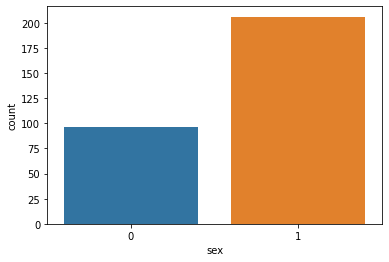

In [28]:
sns.countplot(df['sex'])

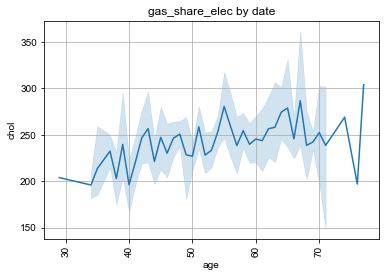

In [29]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')
x1=df['chol']
sns.lineplot(x=df["age"], y=x1, data=df)
sns.set(rc={'figure.figsize':(15,10)})

plt.title("gas_share_elec by date")
plt.xlabel("age")
plt.ylabel("chol")
plt.grid(True)

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.show()

Text(0, 0.5, 'count')

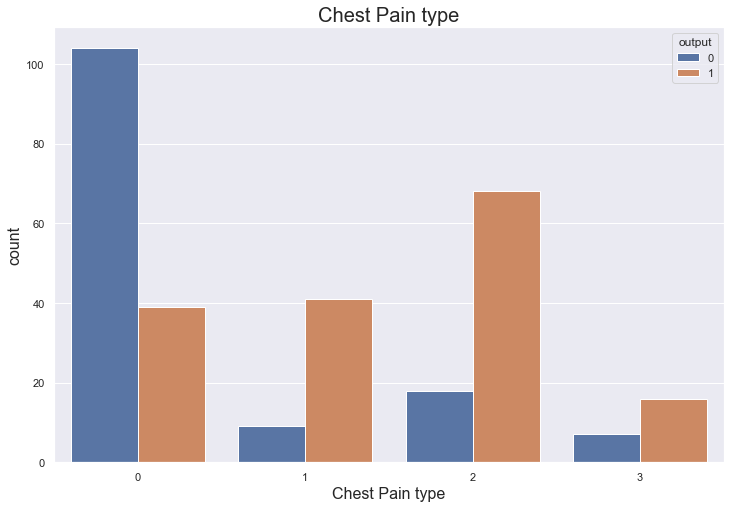

In [30]:
plt.figure(figsize=(12,8))
sns.countplot('cp',hue='output',data=df)
plt.title("Chest Pain type",size=20)
plt.xlabel("Chest Pain type",size=16)
plt.ylabel("count",size=16)

Text(0, 0.5, 'count')

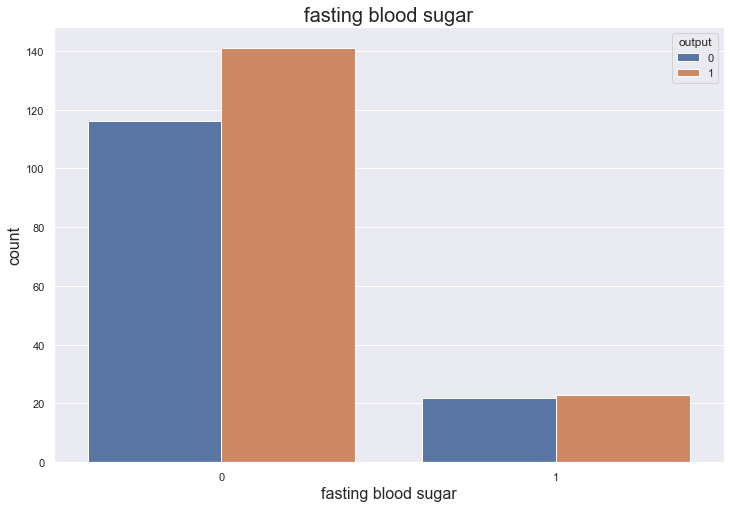

In [31]:
plt.figure(figsize=(12,8))
sns.countplot('fbs',hue='output',data=df)
plt.title("fasting blood sugar",size=20)
plt.xlabel("fasting blood sugar",size=16)
plt.ylabel("count",size=16)

Text(0, 0.5, 'count')

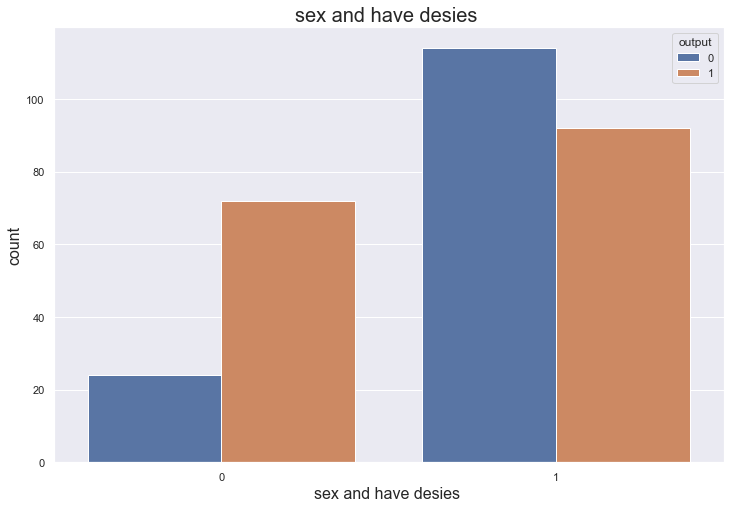

In [32]:
plt.figure(figsize=(12,8))
sns.countplot('sex',hue='output',data=df)
plt.title("sex and have desies ",size=20)
plt.xlabel("sex and have desies ",size=16)
plt.ylabel("count",size=16)

In [33]:
df.caa.value_counts()

0    175
1     65
2     38
3     20
4      4
Name: caa, dtype: int64

Text(0, 0.5, 'count')

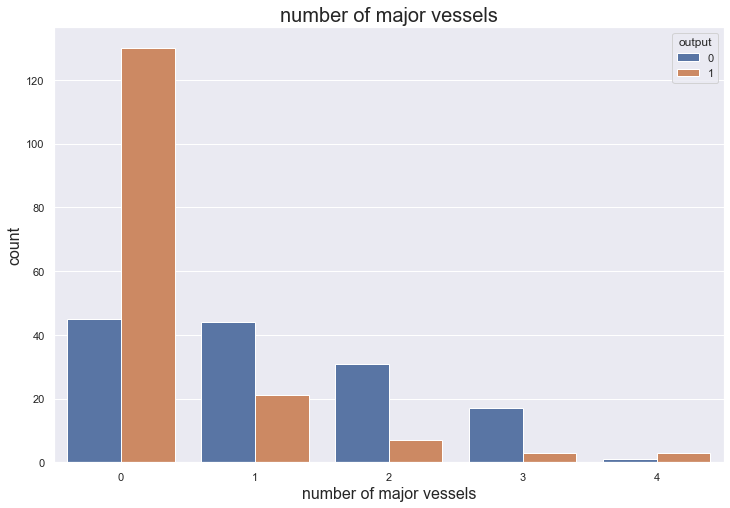

In [34]:
plt.figure(figsize=(12,8))
sns.countplot('caa',hue='output',data=df)
plt.title("number of major vessels",size=20)
plt.xlabel("number of major vessels",size=16)
plt.ylabel("count",size=16)

<AxesSubplot:>

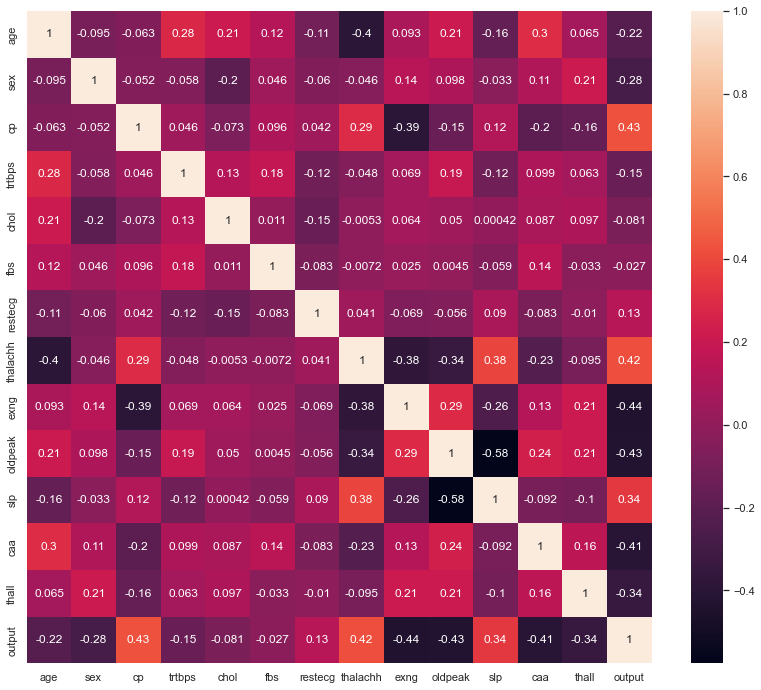

In [35]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='restecg', ylabel='output'>

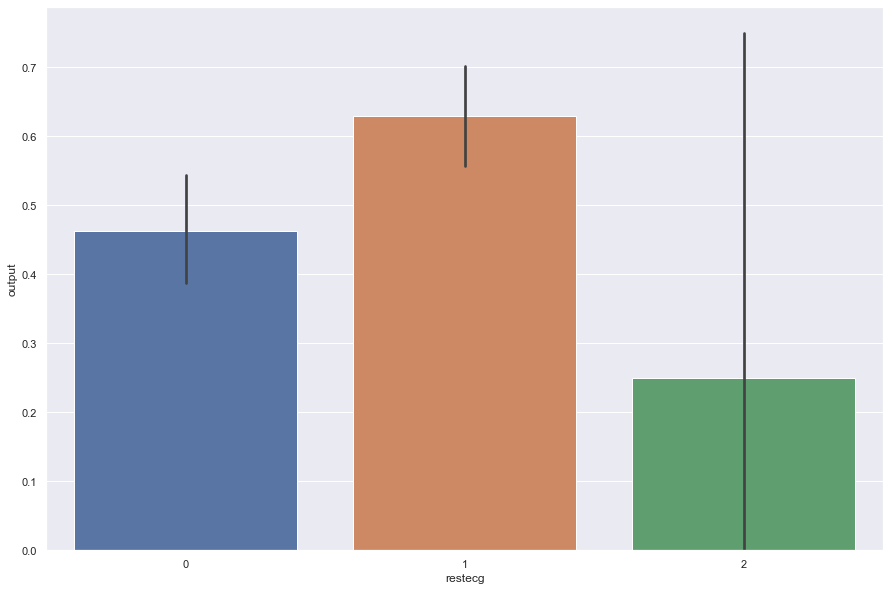

In [36]:
sns.barplot(data=df, x='restecg', y='output')

In [37]:
df.head(1)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


<AxesSubplot:xlabel='age', ylabel='output'>

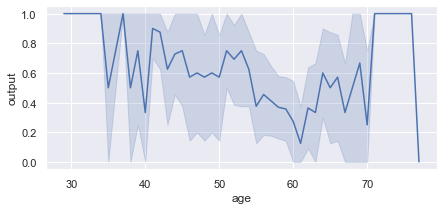

In [38]:
plt.figure(figsize=(7, 3))
sns.lineplot(x = 'age', y = 'output', data = df)

## defini x,y

In [39]:
X = df.drop("output", axis=1).values
y = df.output.values

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

## Train the modal on the training set

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [43]:
model.fit(X_train, y_train)

LogisticRegression()

In [44]:
model.score(X_train, y_train)

0.8755186721991701

## Evaluate the model

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test,Y_pred)

NameError: name 'Y_pred' is not defined

In [ ]:
# Model Evaluation on the test data
mae = round(mean_absolute_error(y_test, y_pred), 3)
mae

In [ ]:
X_test[0]

In [ ]:
model.predict([[ 55 ,   1 ,   0 , 132 , 353 ,   0 ,   1 , 132 ,   1 ,
         1.2,   1 ,   1 ,   3 ]])

In [ ]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()

parameters = {"penalty":["l1", "l2"], "max_iter":[100, 1000, 10000]}

In [ ]:
grid_model = GridSearchCV(model, parameters, cv=5)
grid_model.fit(X, y)

In [ ]:
display(grid_model.best_params_)

best_score = grid_model.best_score_
display(best_score)

## thanks